In [1]:
import sys
sys.path.append('..')

In [2]:
import torch
import numpy as np
from torch import nn
from tqdm import tqdm
from matplotlib import pyplot as plt
from CommonFunctions import *
%matplotlib inline

In [3]:
class ModularNeuralNetwork(nn.Module):
    def __init__(self, 
                 input_size: int, 
                 output_size: int, 
                 layer_sizes: tuple[int] = (), 
                 activation_function: nn.modules.activation = nn.Tanh()):
        super(ModularNeuralNetwork, self).__init__()
        if len(layer_sizes) == 0:
            self.layers = nn.Sequential(
                nn.Linear(in_features=input_size, out_features=output_size),
                activation_function
            )
        elif len(layer_sizes) == 1:
            size = layer_sizes[0]
            self.layers = nn.Sequential(
                nn.Linear(in_features=input_size, out_features=size),
                activation_function,
                nn.Linear(in_features=size, out_features=output_size),
                activation_function
            )
        else:
            layers = []
            for index, layer_size in enumerate(layer_sizes):
                if index == 0:
                    layer = nn.Linear(in_features=input_size, out_features=layer_size)
                else:
                    layer = nn.Linear(in_features=layer_sizes[index - 1], 
                                      out_features=layer_size)
                layers += [layer, activation_function]
            layers += [nn.Linear(in_features=layer_sizes[-1], 
                                 out_features=output_size), 
                       activation_function]
            self.layers = nn.Sequential(*layers)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layers(x)

# $f(x) = sin(70x) e^x$

Let's visualize the function

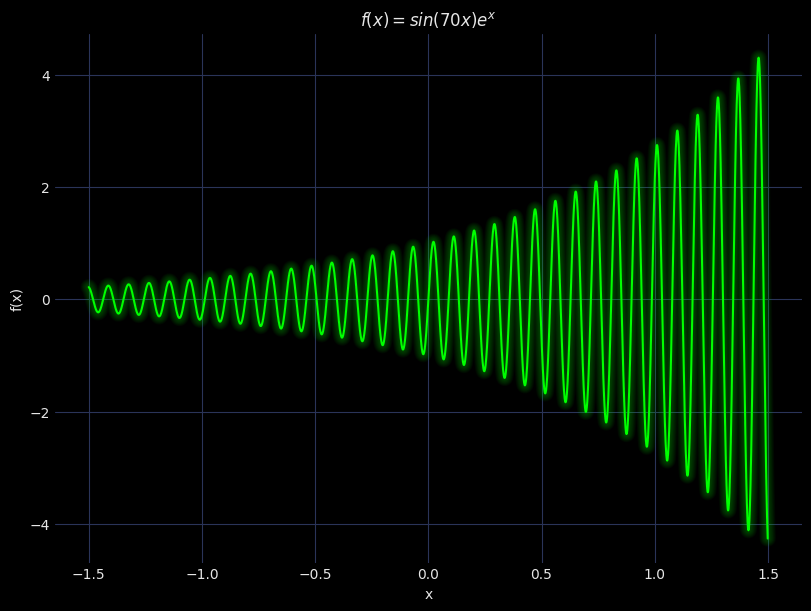

In [4]:
def func(x: torch.Tensor) -> torch.Tensor:
    return torch.sin(70*x)*torch.exp(x)

X = torch.arange(-1.5, 1.5, 0.001).view(-1, 1).type(torch.float32)
y = func(X)

with plt.style.context('cyberpunk'):
    figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(8, 6))
    axes.plot(X, y, color='lime')
    axes.set(xlabel='x', ylabel='f(x)', title='$f(x) = sin(70x)e^x$')
    enhance_plot(figure, axes, glow=True)

Let's build a model

In [5]:
device = torch.device('cpu')
X, y = X.to(device), y.to(device)
leaning_rate = 0.02
hidden_layers = [10]
model = ModularNeuralNetwork(input_size=1,
                             output_size=1,
                             layer_sizes=hidden_layers,
                             activation_function=nn.Tanh()).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=leaning_rate)
loss_fn = nn.MSELoss()
model

ModularNeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10, out_features=1, bias=True)
    (3): Tanh()
  )
)

In [6]:
def train(epochs):
    train_loss = np.zeros(epochs)
    model.train()
    for epoch in tqdm(range(epochs)):
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss[epoch] = loss
    with plt.style.context('cyberpunk'):
        figure, axes = plt.subplots(2, 1, layout='constrained', figsize=(8, 12))
        delay = 1000
        axes[0].scatter(range(delay, len(train_loss)), train_loss[delay:], color='lime', alpha=0.05, s=2)
        axes[0].set(xlabel='epoch', ylabel='Loss', title='Training Loss')
        enhance_plot(figure, axes[0], glow=False)
        model.eval()
        axes[1].plot(X.cpu().numpy(), y.cpu().numpy(),
                     color='blueviolet', linestyle=':', label='Original Function')
        axes[1].plot(X.cpu().numpy(), model(X.view(-1, 1)).cpu().detach().numpy(),
                     color='red', linestyle='--', label='Trained Function')
        axes[1].legend()
        axes[1].set(title='$f(x) = sin(70x)e^x$', 
                    xlabel='x', ylabel='f(x)')
        enhance_plot(figure, axes[1], glow=True, alpha_gradient=0.4)
        figure.suptitle(f'Neural network {hidden_layers}, {N_epochs} epochs')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [01:11<00:00, 1395.03it/s]


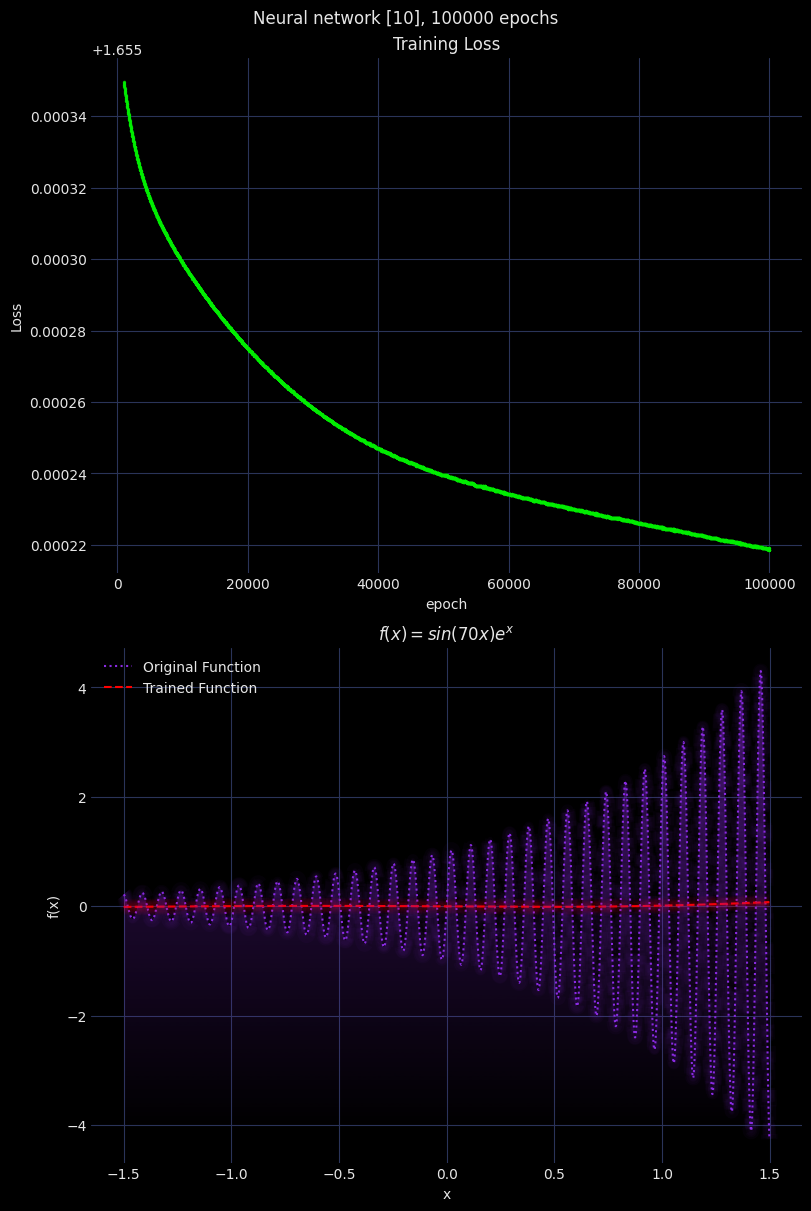

In [7]:
N_epochs = 100000
train(N_epochs)

Let's try a wider network

In [8]:
device = torch.device('cuda')
X, y = X.to(device), y.to(device)
leaning_rate = 0.02
hidden_layers = [10, 20, 50, 20, 10]
model = ModularNeuralNetwork(input_size=1,
                             output_size=1,
                             layer_sizes=hidden_layers,
                             activation_function=nn.Tanh()).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=leaning_rate)
loss_fn = nn.MSELoss()
model

ModularNeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): Tanh()
    (4): Linear(in_features=20, out_features=50, bias=True)
    (5): Tanh()
    (6): Linear(in_features=50, out_features=20, bias=True)
    (7): Tanh()
    (8): Linear(in_features=20, out_features=10, bias=True)
    (9): Tanh()
    (10): Linear(in_features=10, out_features=1, bias=True)
    (11): Tanh()
  )
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [02:38<00:00, 632.89it/s]


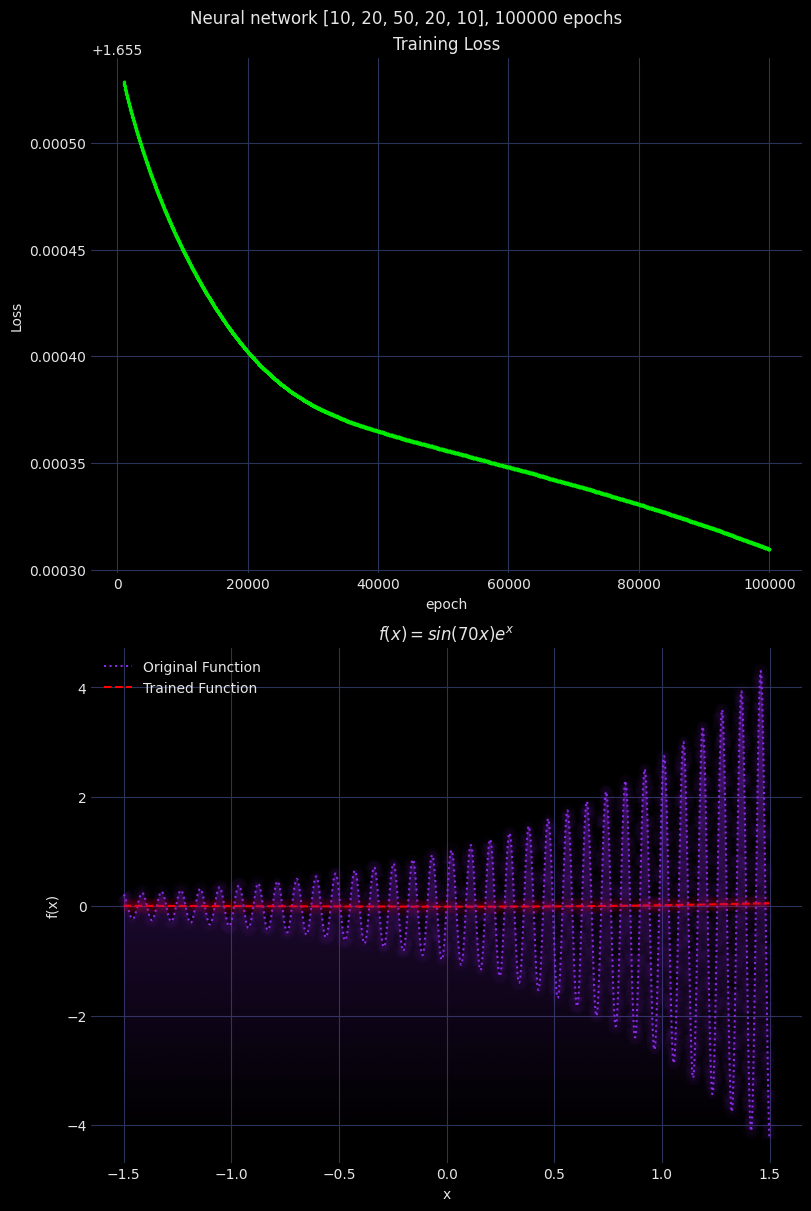

In [9]:
N_epochs = 100000
train(N_epochs)

In [10]:
device = torch.device('cuda')
X, y = X.to(device), y.to(device)
leaning_rate = 0.02
hidden_layers = [1000]
model = ModularNeuralNetwork(input_size=1,
                             output_size=1,
                             layer_sizes=hidden_layers,
                             activation_function=nn.Tanh()).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=leaning_rate)
loss_fn = nn.MSELoss()
model

ModularNeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=1000, bias=True)
    (1): Tanh()
    (2): Linear(in_features=1000, out_features=1, bias=True)
    (3): Tanh()
  )
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [02:00<00:00, 831.45it/s]


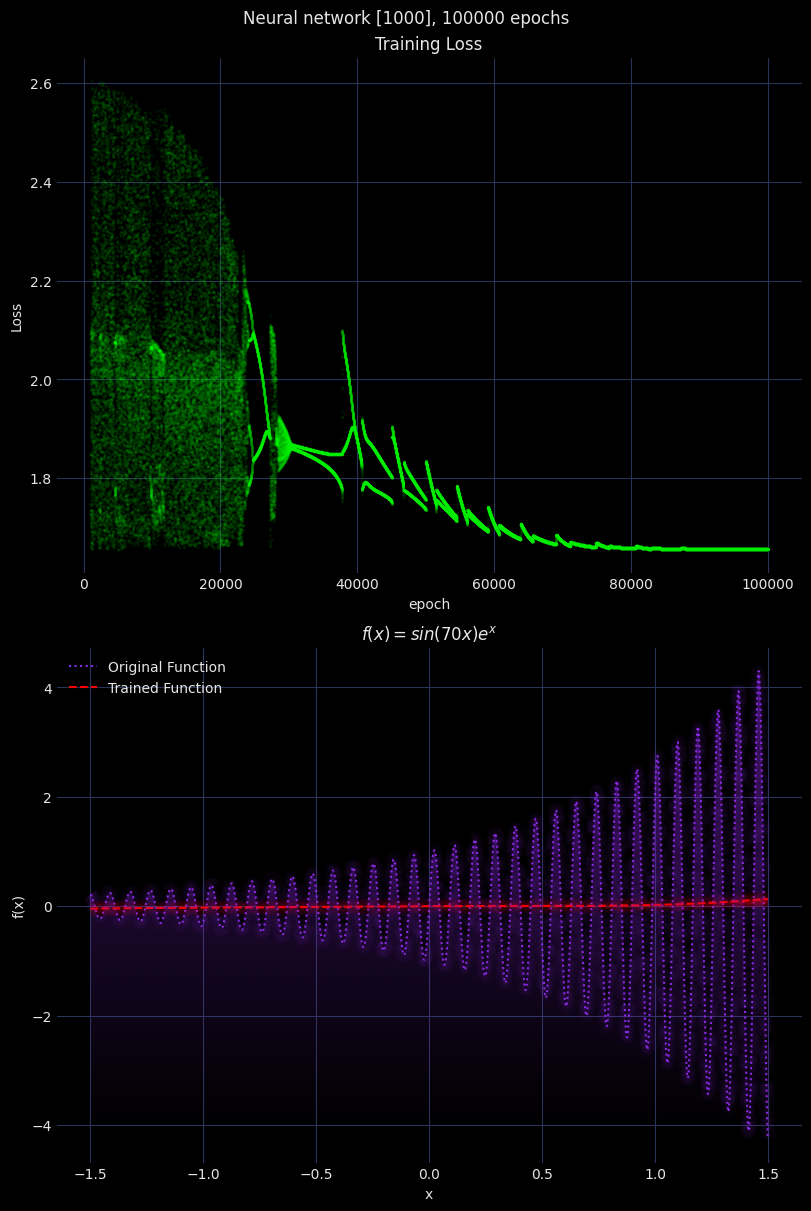

In [11]:
N_epochs = 100000
train(N_epochs)

To approximate rapid frequencies we need to define a custom activation function

$$ a(x) = x + \frac{1}{a}sin^2(ax) $$

In [12]:
class SineActivation(nn.Module):
    def __init__(self, a: float):
        super(SineActivation, self).__init__()
        self.a = a
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x + (torch.sin(self.a*x)**2) / self.a

Parameter $a$ needs to match sine frequency

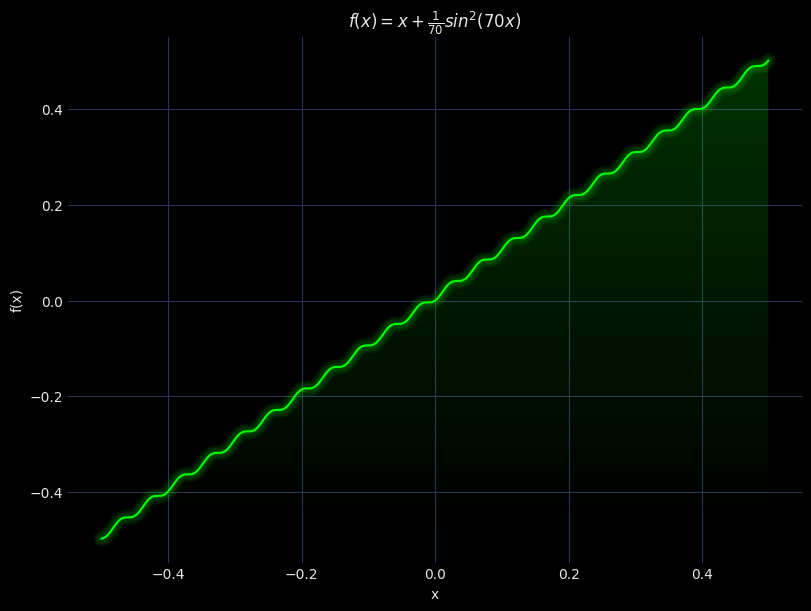

In [13]:
sine_activation = SineActivation(70)
x = torch.arange(-0.5, 0.5, 0.001)
y = sine_activation(x)
with plt.style.context('cyberpunk'):
    figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(8, 6))
    axes.plot(x, y, color='lime')
    axes.set(xlabel='x', ylabel='f(x)', title='$f(x) = x + \\frac{1}{70}sin^2(70x)$')
    enhance_plot(figure, axes, glow=True, alpha_gradient=0.2)

In [14]:
def func(x: torch.Tensor) -> torch.Tensor:
    return torch.sin(x*70.)*torch.exp(x)

In [15]:
X = torch.arange(-1.5, 1.5, 0.01).view(-1, 1).type(torch.float32)
y = func(X)
device = torch.device("cuda")
X, y = X.to(device), y.to(device)
leaning_rate = 0.001
hidden_layers = [1000]
model = ModularNeuralNetwork(input_size=1,
                             output_size=1,
                             layer_sizes=hidden_layers,
                             activation_function=SineActivation(70)).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=leaning_rate)
loss_fn = nn.MSELoss()
model

ModularNeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=1000, bias=True)
    (1): SineActivation()
    (2): Linear(in_features=1000, out_features=1, bias=True)
    (3): SineActivation()
  )
)

In [16]:
N_epochs = 800_000
train_loss = np.zeros(N_epochs)
epoch_snapshots = [200_000, 400_000, 600_000, N_epochs]
loss_snapshot = []
y_pred_snapshot = []
model.train()
for epoch in tqdm(range(N_epochs)):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss[epoch] = loss
    if epoch % 200_000 == 0 and epoch != 0:
        loss_snapshot.append(loss)
        y_pred_snapshot.append(y_pred.cpu().detach().numpy())
    elif epoch == N_epochs - 1:
        loss_snapshot.append(loss)
        y_pred_snapshot.append(y_pred.cpu().detach().numpy())

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 800000/800000 [16:30<00:00, 807.75it/s]


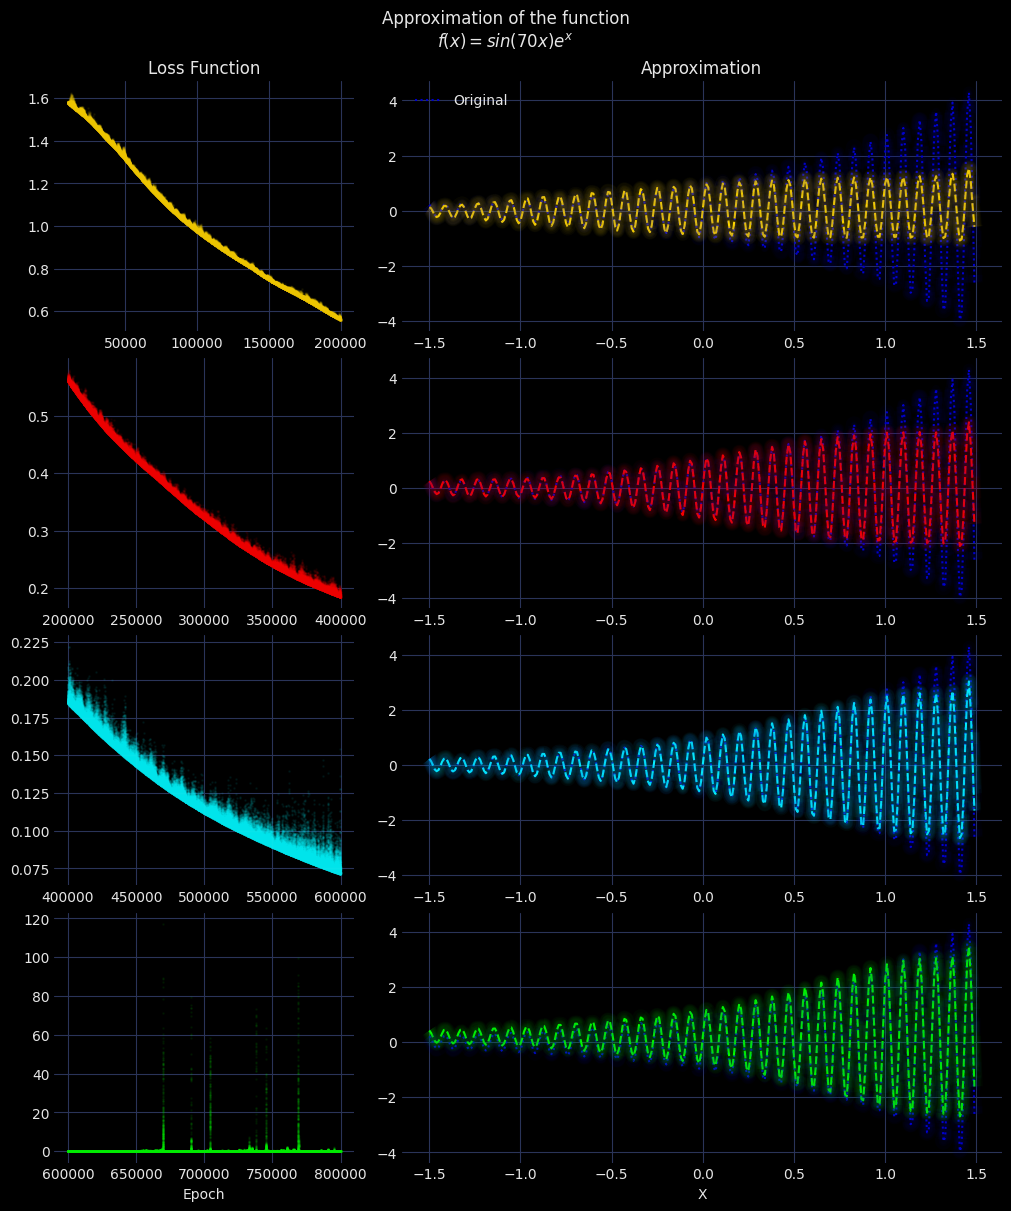

In [28]:
colors = ['gold', 'red', None, 'lime']
with plt.style.context('cyberpunk'):
    figure, axes = plt.subplots(4, 2, 
                                layout='constrained', 
                                figsize=(10, 12),
                                width_ratios=[1, 2])
    for index, (loss_value, y_preds, color) in enumerate(zip(loss_snapshot, y_pred_snapshot, colors)):
        delay = 10000
        if index == 0:
            loss_part = train_loss[delay:epoch_snapshots[index]]
            loss_x = range(delay, epoch_snapshots[index])
        else:
            loss_part = train_loss[epoch_snapshots[index - 1]: epoch_snapshots[index]]
            loss_x = range(epoch_snapshots[index - 1], epoch_snapshots[index])
        axes[index, 0].scatter(loss_x, loss_part, color=color, alpha=0.05, s=1)
        enhance_plot(figure, axes[index, 0], glow=False)
        axes[index, 1].plot(X.cpu().numpy(), y.cpu().numpy(), color='mediumblue', linestyle=':', label='Original')
        if index == 0: axes[0, 1].legend()
        axes[index, 1].plot(X.cpu().numpy(), y_preds, color=color, linestyle='--')
        enhance_plot(figure, axes[index, 1], glow=True)
    axes[0, 0].set(title='Loss Function')
    axes[0, 1].set(title='Approximation')
    axes[3, 0].set(xlabel='Epoch')
    axes[3, 1].set(xlabel='X')
    figure.suptitle('Approximation of the function\n$f(x) = sin(70x)e^x$')